In [40]:
import requests
import pandas as pd
import numpy as np

In [46]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()

json.key()

AttributeError: 'dict' object has no attribute 'key'

In [76]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [77]:
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1220,1260,1270,1280,1170,1240,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1130,1235,1120,1220,1130,1250,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,...,None,False,0,1095,1100,1070,1120,1130,1110,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,...,None,False,0,1120,1155,1120,1130,1120,1180,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,...,None,False,0,1130,1185,1100,1120,1160,1250,131


In [78]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_con

In [79]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

In [80]:
slim_elements_df.head()
slim_elements_df['team'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [81]:
elements_types_df.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],94
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],264
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],357
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],108


In [82]:
slim_elements_df = slim_elements_df.copy()
slim_elements_df.loc[:, 'position'] = slim_elements_df['element_type'].map(elements_types_df.set_index('id')['singular_name'])

In [83]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Balogun,1,4,0.2,44,0,10024,0.0,0,Forward
1,Alves Soares,1,2,0.4,39,34,36965,0.5,2,Defender
2,Elneny,1,3,0.1,44,24,13217,1.1,5,Midfielder
3,Ferreira Vieira,1,3,0.1,54,236,11518,3.9,21,Midfielder
4,dos Santos Magalhães,1,2,25.0,52,1904,2415352,18.1,94,Defender


In [84]:
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1220,1260,1270,1280,1170,1240,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1130,1235,1120,1220,1130,1250,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,...,None,False,0,1095,1100,1070,1120,1130,1110,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,...,None,False,0,1120,1155,1120,1130,1120,1180,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,...,None,False,0,1130,1185,1100,1120,1160,1250,131


In [85]:
#slim_elements_df.drop(columns=['team'], inplace=True)
slim_elements_df.loc[:, 'team_name'] = slim_elements_df['team'].map(teams_df.set_index('id')['name'])

In [86]:
# Create the 'Points Per Time Played' column with conditional assignment
slim_elements_df['points_by_time'] = np.where(slim_elements_df['minutes'] == 0, 0,  round(slim_elements_df['total_points'] / slim_elements_df['minutes']*100, 2))
#slim_elements_df.drop('Points Per Time Played', axis=1, inplace=True)
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,team_name,points_by_time
0,Balogun,1,4,0.2,44,0,10024,0.0,0,Forward,Arsenal,0.00
1,Alves Soares,1,2,0.4,39,34,36965,0.5,2,Defender,Arsenal,5.88
2,Elneny,1,3,0.1,44,24,13217,1.1,5,Midfielder,Arsenal,20.83
3,Ferreira Vieira,1,3,0.1,54,236,11518,3.9,21,Midfielder,Arsenal,8.90
4,dos Santos Magalhães,1,2,25.0,52,1904,2415352,18.1,94,Defender,Arsenal,4.94


# Best Value For Money

In [95]:
slim_elements_df.rename(columns={'selected_by_percent': '%_selected'}, inplace=True)
# Convert 'value_season' column to float
slim_elements_df['value_season'] = slim_elements_df['value_season'].astype(float)

slim_elements_df.sort_values('value_season',ascending=False).head(10)

,second_name,team,element_type,%_selected,now_cost,minutes,transfers_in,value_season,total_points,position,team_name,points_by_time
279,Palmer,7,3,33.6,58,1574,5392386,21.4,124,Midfielder,Chelsea,7.88
48,Soares de Paulo,2,3,10.1,55,2058,2403746,20.9,115,Midfielder,Aston Villa,5.59
462,Morris,12,4,3.5,50,1689,1420664,20.2,101,Forward,Luton,5.98
353,Pickford,9,1,11.7,46,2250,964802,20.2,93,Goalkeeper,Everton,4.13
751,Areola,19,1,35.1,42,1935,2886021,20.0,84,Goalkeeper,West Ham,4.34
576,Gordon,15,3,15.3,61,1976,4691880,19.5,119,Midfielder,Newcastle,6.02
809,Santos Carneiro Da Cunha,20,4,3.2,56,1962,1455757,19.3,108,Forward,Wolves,5.50
554,Onana,14,1,12.6,48,2250,1020790,18.8,90,Goalkeeper,Man Utd,4.00
64,Watkins,2,4,52.2,87,2209,6980796,18.5,161,Forward,Aston Villa,7.29
495,Álvarez,13,4,25.1,67,2082,6825315,18.4,123,Forward,Man City,5.91


In [96]:
slim_elements_df.sort_values('points_by_time',ascending=False).head(10)
slim_elements_df[slim_elements_df['total_points'] > 20].sort_values('points_by_time', ascending=False).head(10)

,second_name,team,element_type,%_selected,now_cost,minutes,transfers_in,value_season,total_points,position,team_name,points_by_time
797,Kalajdzic,20,4,0.1,49,158,25714,4.9,24,Forward,Wolves,15.19
49,Durán,2,4,0.1,50,174,50996,4.8,24,Forward,Aston Villa,13.79
497,Bobb,13,3,0.1,44,175,16563,5.2,23,Midfielder,Man City,13.14
442,Bradley,11,2,5.3,41,298,702486,8.0,33,Defender,Liverpool,11.07
587,Murphy,15,3,0.1,48,322,34785,6.5,31,Midfielder,Newcastle,9.63
318,Olise,8,3,0.5,57,754,396006,12.6,72,Midfielder,Crystal Palace,9.55
501,De Bruyne,13,3,30.4,108,326,3621275,2.9,31,Midfielder,Man City,9.51
22,Trossard,1,3,2.5,65,887,396333,12.8,83,Midfielder,Arsenal,9.36
426,Salah,11,3,21.4,130,1786,4711263,12.8,167,Midfielder,Liverpool,9.35
412,Teixeira da Silva,11,3,9.9,83,1044,2855477,11.7,97,Midfielder,Liverpool,9.29


In [101]:
slim_elements_df.pivot_table(index='position',values='value_season',aggfunc=np.mean).reset_index()

,position,value_season
0,Defender,4.921591
1,Forward,4.720370
2,Goalkeeper,3.672340
3,Midfielder,4.841457


In [102]:
pivot=slim_elements_df.pivot_table(index='position',values='value_season',aggfunc=np.mean).reset_index()
pivot.sort_values('value_season',ascending=False)

,position,value_season
0,Defender,4.921591
3,Midfielder,4.841457
1,Forward,4.720370
2,Goalkeeper,3.672340


In [105]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value_season > 0]

In [106]:
pivot = slim_elements_df.pivot_table(index='position',values='value_season',aggfunc=np.mean).reset_index()
pivot.sort_values('value_season',ascending=False)

,position,value_season
2,Goalkeeper,9.877143
1,Forward,7.282857
0,Defender,7.182873
3,Midfielder,6.969355


In [108]:
team_pivot = slim_elements_df.pivot_table(index='team_name',values='value_season',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value_season',ascending=False)

,team_name,value_season
0,Arsenal,9.483333
12,Man City,9.109091
8,Everton,8.634783
9,Fulham,8.448000
1,Aston Villa,8.404000
19,Wolves,8.337500
11,Luton,8.165217
18,West Ham,7.770833
17,Spurs,7.650000
4,Brighton,7.411111


In [109]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

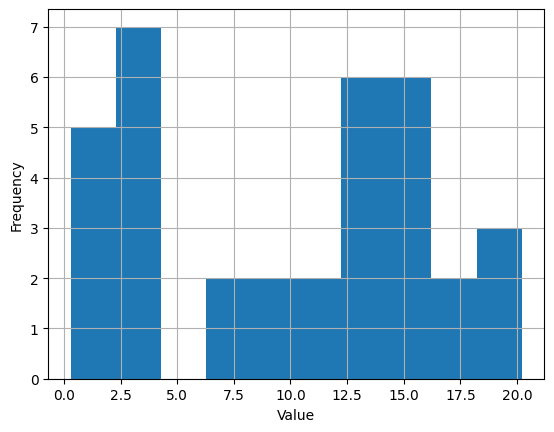

In [110]:
import matplotlib.pyplot as plt

# Plot the histogram
goal_df['value_season'].hist()

# Add labels to the axes
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [111]:
goal_df.sort_values('value_season',ascending=False).head(10)

,second_name,team,element_type,%_selected,now_cost,minutes,transfers_in,value_season,total_points,position,team_name,points_by_time
353,Pickford,9,1,11.7,46,2250,964802,20.2,93,Goalkeeper,Everton,4.13
751,Areola,19,1,35.1,42,1935,2886021,20.0,84,Goalkeeper,West Ham,4.34
554,Onana,14,1,12.6,48,2250,1020790,18.8,90,Goalkeeper,Man Utd,4.00
379,Leno,10,1,15.0,48,2250,1814224,17.9,86,Goalkeeper,Fulham,3.82
94,Murara Neto,3,1,3.4,46,1980,567649,17.2,79,Goalkeeper,Bournemouth,3.99
129,Flekken,4,1,3.4,45,2115,628030,16.2,73,Goalkeeper,Brentford,3.45
26,Raya Martin,1,1,7.0,50,1800,963241,15.8,79,Goalkeeper,Arsenal,4.39
54,Martínez Romero,2,1,13.3,53,2160,1376846,15.8,84,Goalkeeper,Aston Villa,3.89
409,Ramses Becker,11,1,12.5,58,1890,1509486,15.0,87,Goalkeeper,Liverpool,4.60
736,Vicario,18,1,7.9,53,2250,1388319,14.9,79,Goalkeeper,Spurs,3.51


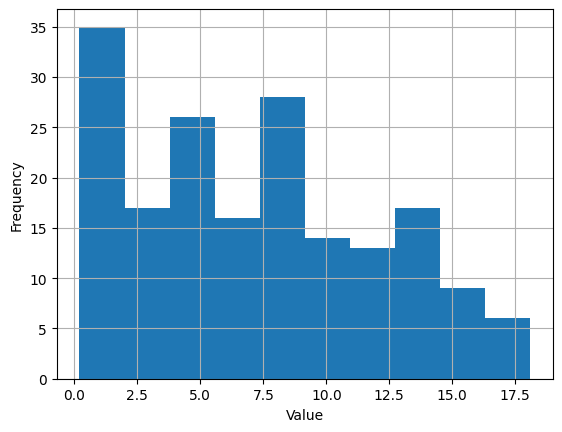

In [118]:
# Plot the histogram
def_df.value_season.hist()

# Add labels to the axes
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [114]:
def_df.sort_values('value_season',ascending=False).head(10)

,second_name,team,element_type,%_selected,now_cost,minutes,transfers_in,value_season,total_points,position,team_name,points_by_time
4,dos Santos Magalhães,1,2,25.0,52,1904,2415352,18.1,94,Defender,Arsenal,4.94
18,Saliba,1,2,38.6,57,2250,4035000,17.9,102,Defender,Arsenal,4.53
350,Mykolenko,9,2,5.8,46,1797,1050336,17.6,81,Defender,Everton,4.51
355,Tarkowski,9,2,5.8,46,2250,950156,17.6,81,Defender,Everton,3.60
25,Zinchenko,1,2,7.5,51,1427,1563224,16.7,85,Defender,Arsenal,5.96
23,White,1,2,10.7,56,1889,1538115,16.6,93,Defender,Arsenal,4.92
302,Andersen,8,2,14.5,47,2250,3141032,16.2,76,Defender,Crystal Palace,3.38
457,Doughty,12,2,7.8,46,1813,1095418,16.1,74,Defender,Luton,4.08
338,Branthwaite,9,2,5.5,42,1980,790897,16.0,67,Defender,Everton,3.38
591,Schär,15,2,8.1,54,2173,1628859,15.6,84,Defender,Newcastle,3.87


In [119]:
mid_df.sort_values('value_season',ascending=False).head(10)

,second_name,team,element_type,%_selected,now_cost,minutes,transfers_in,value_season,total_points,position,team_name,points_by_time
279,Palmer,7,3,33.6,58,1574,5392386,21.4,124,Midfielder,Chelsea,7.88
48,Soares de Paulo,2,3,10.1,55,2058,2403746,20.9,115,Midfielder,Aston Villa,5.59
576,Gordon,15,3,15.3,61,1976,4691880,19.5,119,Midfielder,Newcastle,6.02
793,Hee-chan,20,3,7.2,56,1533,2383069,18.2,102,Midfielder,Wolves,6.65
27,Rice,1,3,5.2,54,2139,593645,18.1,98,Midfielder,Arsenal,4.58
612,Elanga,16,3,1.5,51,1627,426562,18.0,92,Midfielder,Nott'm Forest,5.65
171,Groß,5,3,9.1,65,2001,1379378,17.8,116,Midfielder,Brighton,5.80
545,McTominay,14,3,1.6,46,1247,484556,17.8,82,Midfielder,Man Utd,6.58
774,Ward-Prowse,19,3,7.5,60,2132,2560984,17.8,107,Midfielder,West Ham,5.02
17,Saka,1,3,63.4,91,2055,5330387,17.5,159,Midfielder,Arsenal,7.74


In [120]:
fwd_df.sort_values('value_season',ascending=False).head(10)

,second_name,team,element_type,%_selected,now_cost,minutes,transfers_in,value_season,total_points,position,team_name,points_by_time
462,Morris,12,4,3.5,50,1689,1420664,20.2,101,Forward,Luton,5.98
809,Santos Carneiro Da Cunha,20,4,3.2,56,1962,1455757,19.3,108,Forward,Wolves,5.50
64,Watkins,2,4,52.2,87,2209,6980796,18.5,161,Forward,Aston Villa,7.29
495,Álvarez,13,4,25.1,67,2082,6825315,18.4,123,Forward,Man City,5.91
102,Solanke,3,4,20.8,69,2137,4254706,18.3,126,Forward,Bournemouth,5.90
450,Adebayo,12,4,4.1,49,1149,745591,16.3,80,Forward,Luton,6.96
172,Junqueira de Jesus,5,4,6.9,53,1385,2062209,15.7,83,Forward,Brighton,5.99
646,Wood,16,4,0.7,48,863,345636,15.6,75,Forward,Nott'm Forest,8.69
666,Archer,17,4,5.2,43,1449,1486920,15.3,66,Forward,Sheffield Utd,4.55
411,Núñez Ribeiro,11,4,17.0,76,1458,4028374,13.3,101,Forward,Liverpool,6.93


In [121]:
fwd_df.sort_values('total_points',ascending=False).head(10)

,second_name,team,element_type,%_selected,now_cost,minutes,transfers_in,value_season,total_points,position,team_name,points_by_time
64,Watkins,2,4,52.2,87,2209,6980796,18.5,161,Forward,Aston Villa,7.29
506,Haaland,13,4,75.4,144,1668,4606766,9.8,141,Forward,Man City,8.45
102,Solanke,3,4,20.8,69,2137,4254706,18.3,126,Forward,Bournemouth,5.90
495,Álvarez,13,4,25.1,67,2082,6825315,18.4,123,Forward,Man City,5.91
809,Santos Carneiro Da Cunha,20,4,3.2,56,1962,1455757,19.3,108,Forward,Wolves,5.50
462,Morris,12,4,3.5,50,1689,1420664,20.2,101,Forward,Luton,5.98
411,Núñez Ribeiro,11,4,17.0,76,1458,4028374,13.3,101,Forward,Liverpool,6.93
172,Junqueira de Jesus,5,4,6.9,53,1385,2062209,15.7,83,Forward,Brighton,5.99
450,Adebayo,12,4,4.1,49,1149,745591,16.3,80,Forward,Luton,6.96
579,Isak,15,4,11.0,75,1178,3011108,10.5,79,Forward,Newcastle,6.71


In [122]:
fwd_df.sort_values('points_by_time',ascending=False).head(10)

,second_name,team,element_type,%_selected,now_cost,minutes,transfers_in,value_season,total_points,position,team_name,points_by_time
606,Ndiweni,15,4,0.0,44,1,2421,0.2,1,Forward,Newcastle,100.00
664,Duarte Ribeiro,16,4,0.0,45,1,672,0.2,1,Forward,Nott'm Forest,100.00
362,Cannon,9,4,0.0,45,1,2480,0.2,1,Forward,Everton,100.00
447,Danns,11,4,0.0,45,1,60,0.2,1,Forward,Liverpool,100.00
743,Donley,18,4,0.0,45,3,8175,0.4,2,Forward,Spurs,66.67
284,Burstow,7,4,0.1,45,8,4401,0.4,2,Forward,Chelsea,25.00
741,Véliz,18,4,0.1,54,45,8936,2.0,11,Forward,Spurs,24.44
696,Hackford,17,4,0.1,44,11,12007,0.5,2,Forward,Sheffield Utd,18.18
797,Kalajdzic,20,4,0.1,49,158,25714,4.9,24,Forward,Wolves,15.19
361,Ramalho Chermiti,9,4,0.1,48,57,7108,1.7,8,Forward,Everton,14.04
